In [12]:
#Import necessary libraries for ML and Pre-Processing

!pip install feature-engine 
!pip install imbalanced-learn

from feature_engine.imputation import RandomSampleImputer


#Importing the necessary libraries for EDA and model building

import numpy as np 

import pandas as pd 

from sklearn import preprocessing

import matplotlib.pyplot as plt 

import seaborn as sns

import warnings

import time

warnings.simplefilter(action='ignore')



import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


#importing ML models from sklearn library

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import LogisticRegression



#Importing metrics functions from SK Learn

from sklearn.metrics import roc_auc_score, r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report, confusion_matrix



from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

from pprint import pprint


# # Used for Downloading MNIST

# from sklearn.datasets import fetch_mldata



# Used for Splitting Training and Test Sets

from sklearn.model_selection import train_test_split



%matplotlib inline

In [13]:
dataset = pd.read_csv('dementia_dataset.csv')
dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [14]:
#dropping the converted Group data points
classes = ['Nondemented', 'Demented']
dataset.drop(dataset.loc[dataset['Group'] == 'Converted'].index, inplace=True) # dataset.Group[dataset.Group == 'Converted'] = 'Nondemented' 


#Dropping the unwanted columns that won't be needing to include in our model
dataset.drop(['Subject ID', 'MRI ID', 'Hand','CDR','MR Delay','Visit'], axis=1, inplace=True) # 'Visit','Age','EDUC','eTIV',...

#Encoding binary variables
dataset['M/F'] = dataset['M/F'].apply(lambda x: ['M', 'F'].index(x))

#Encoding the class variable
dataset['Class'] = [classes.index(group) for group in dataset['Group']]
dataset.head()

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Class
0,Nondemented,0,87,14,2.0,27.0,1987,0.696,0.883,0
1,Nondemented,0,88,14,2.0,30.0,2004,0.681,0.876,0
2,Demented,0,75,12,NaN,23.0,1678,0.736,1.046,1
3,Demented,0,76,12,NaN,28.0,1738,0.713,1.010,1
4,Demented,0,80,12,NaN,22.0,1698,0.701,1.034,1


In [15]:
from feature_engine.imputation import RandomSampleImputer

imputer = RandomSampleImputer(
        random_state=['SES','MMSE'],
        seed='observation',
        seeding_method='add'
    )

# fit the imputer
imputer.fit(dataset)

dataset = imputer.transform(dataset)
dataset.head()

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Class
0,Nondemented,0,87,14,2.0,27.0,1987,0.696,0.883,0
1,Nondemented,0,88,14,2.0,30.0,2004,0.681,0.876,0
2,Demented,0,75,12,1.0,23.0,1678,0.736,1.046,1
3,Demented,0,76,12,2.0,28.0,1738,0.713,1.010,1
4,Demented,0,80,12,2.0,22.0,1698,0.701,1.034,1


In [16]:
y = dataset.Class
dataset.drop(['Group','Class'], axis=1, inplace=True) # 'MR Delay''Visit',
X = dataset

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.562500,76.711310,14.502976,2.529762,27.157738,1491.306548,0.730211,1.193595
std,0.496818,7.614793,2.900333,1.113958,3.838003,179.940267,0.037313,0.140914
min,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,26.000000,1357.000000,0.700750,1.097500
50%,1.000000,76.000000,14.000000,2.000000,29.000000,1475.000000,0.731000,1.190000
75%,1.000000,82.000000,16.000000,3.000000,30.000000,1599.750000,0.756000,1.293000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


# adv analysis

In [18]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVC': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'Multiple Logistic': LogisticRegression(solver='liblinear'),
    'KNN':KNeighborsClassifier(),
    'GausianNB':GaussianNB(),
    'Gradient Boost':GradientBoostingClassifier(criterion = "friedman_mse"),
    'Ridge': LogisticRegression(penalty='l2', C=1.0),
    'Lasso': LogisticRegression(penalty='l1', C=1, solver='liblinear'),
    'Elastic-net':LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1, solver='saga')


}

for name, model in models.items():
    model.fit(train_feature, train_label)
    
    # Training set
    train_pred = model.predict(train_feature)
    train_acc = accuracy_score(train_label, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature)
    test_acc = accuracy_score(test_label, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    print(name)
    print('='*len(name))
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print('\n\n')


Random Forest
Training Accuracy: 1.0000
Training Error Rate: 0.0000
Training F1 Score: 1.0000
Training Confusion Matrix:
[[152   0]
 [  0 116]]


Test Accuracy: 0.9412
Test Error Rate: 0.0588
Test F1 Score: 0.9412
Test Confusion Matrix:
[[36  2]
 [ 2 28]]



XGBoost
Training Accuracy: 1.0000
Training Error Rate: 0.0000
Training F1 Score: 1.0000
Training Confusion Matrix:
[[152   0]
 [  0 116]]


Test Accuracy: 0.9559
Test Error Rate: 0.0441
Test F1 Score: 0.9559
Test Confusion Matrix:
[[36  2]
 [ 1 29]]



SVC
===
Training Accuracy: 0.5672
Training Error Rate: 0.4328
Training F1 Score: 0.4105
Training Confusion Matrix:
[[152   0]
 [116   0]]


Test Accuracy: 0.5588
Test Error Rate: 0.4412
Test F1 Score: 0.4007
Test Confusion Matrix:
[[38  0]
 [30  0]]



LDA
===
Training Accuracy: 0.8097
Training Error Rate: 0.1903
Training F1 Score: 0.8044
Training Confusion Matrix:
[[141  11]
 [ 40  76]]


Test Accuracy: 0.8676
Test Error Rate: 0.1324
Test F1 Score: 0.8630
Test Confusion Matrix:
[[38

In [ ]:
#Balancing the data to reduce model bias towards one classification

In [19]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size=0.2, random_state=42)

Counter({0: 190, 1: 146})
Counter({0: 190, 1: 190})


In [20]:
X.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.521053,76.571053,14.378947,2.537636,26.729512,1490.673684,0.728517,1.193931
std,0.500215,7.400542,2.863394,1.108911,4.066571,178.907027,0.036631,0.140646
min,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,25.000000,1357.000000,0.699750,1.097500
50%,1.000000,76.000000,14.000000,2.385095,28.000000,1475.000000,0.728000,1.189512
75%,1.000000,81.000000,16.000000,3.207795,30.000000,1599.750000,0.753844,1.293000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


regularization added to xg boost to reduce overfitting
#Regularization: Adding a penalty term to the objective function during training can prevent the model from overfitting to the training data and reduce its complexity.

In [78]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# set random seed for reproducibility
np.random.seed(42)

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(alpha=1),
    'SVC': SVC(probability=True),
    'LDA': LinearDiscriminantAnalysis(),
    'Multiple Logistic': LogisticRegression(solver='liblinear'),
    'KNN':KNeighborsClassifier(),
    'GausianNB':GaussianNB(),
    'Gradient Boost':GradientBoostingClassifier(criterion = "friedman_mse"),
    'Ridge': LogisticRegression(penalty='l2', C=1.0),
    'Lasso': LogisticRegression(penalty='l1', C=1, solver='liblinear'),
    'Elastic-net':LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=1, solver='saga')


}

for name, model in models.items():
    model.fit(train_feature, train_label)
    
    # Training set
    train_pred = model.predict(train_feature)
    train_acc = accuracy_score(train_label, train_pred)
    train_err = 1 - train_acc
    train_f1 = f1_score(train_label, train_pred, average='weighted')
    train_cm = confusion_matrix(train_label, train_pred)
    
    # Test set
    test_pred = model.predict(test_feature)
    test_acc = accuracy_score(test_label, test_pred)
    test_err = 1 - test_acc
    test_f1 = f1_score(test_label, test_pred, average='weighted')
    test_cm = confusion_matrix(test_label, test_pred)
    
    print(name)
    print('='*len(name))
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Training Error Rate: {train_err:.4f}')
    print(f'Training F1 Score: {train_f1:.4f}')
    print(f'Training Confusion Matrix:\n{train_cm}')
    print('\n')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Test Error Rate: {test_err:.4f}')
    print(f'Test F1 Score: {test_f1:.4f}')
    print(f'Test Confusion Matrix:\n{test_cm}')
    print('\n\n')


Random Forest
Training Accuracy: 1.0000
Training Error Rate: 0.0000
Training F1 Score: 1.0000
Training Confusion Matrix:
[[151   0]
 [  0 153]]


Test Accuracy: 0.9211
Test Error Rate: 0.0789
Test F1 Score: 0.9211
Test Confusion Matrix:
[[36  3]
 [ 3 34]]



XGBoost
Training Accuracy: 0.9934
Training Error Rate: 0.0066
Training F1 Score: 0.9934
Training Confusion Matrix:
[[151   0]
 [  2 151]]


Test Accuracy: 0.9342
Test Error Rate: 0.0658
Test F1 Score: 0.9342
Test Confusion Matrix:
[[37  2]
 [ 3 34]]



SVC
===
Training Accuracy: 0.5000
Training Error Rate: 0.5000
Training F1 Score: 0.3468
Training Confusion Matrix:
[[  2 149]
 [  3 150]]


Test Accuracy: 0.4868
Test Error Rate: 0.5132
Test F1 Score: 0.3408
Test Confusion Matrix:
[[ 1 38]
 [ 1 36]]



LDA
===
Training Accuracy: 0.8289
Training Error Rate: 0.1711
Training F1 Score: 0.8278
Training Confusion Matrix:
[[138  13]
 [ 39 114]]


Test Accuracy: 0.8553
Test Error Rate: 0.1447
Test F1 Score: 0.8544
Test Confusion Matrix:
[[36

# Randomized grid search cv

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
rf_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                  max_depth=grid_search.best_params_['max_depth'], 
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                  max_features=grid_search.best_params_['max_features'])
rf_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = rf_best.score(train_feature, train_label)
test_acc = rf_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation score:  0.880712788259958
Training accuracy:  1.0
Test accuracy:  0.9411764705882353


# use bootstrap to reduce overfitting to rf after using grid search cv

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.base import clone


# Define the model with bootstrapping
model = RandomForestClassifier(n_estimators=100, 
                               max_features='sqrt', 
                               min_samples_leaf= 1,
                               min_samples_split= 6,
                               max_depth=30, 
                               random_state=42)

# Train the model with bootstrapping
n_bootstraps = 10
bootstrapped_models = []
for i in range(n_bootstraps):
    X_boot, y_boot = resample(train_feature, train_label, random_state=i)
    model_i = clone(model)
    model_i.fit(X_boot, y_boot)
    bootstrapped_models.append(model_i)

# Make predictions by averaging the bootstrapped models
y_pred = np.mean([model.predict(test_feature) for model in bootstrapped_models], axis=0)

In [96]:
from sklearn.metrics import accuracy_score, f1_score

# Calculate accuracy and f1 score on train set
train_pred = np.mean([model.predict(train_feature) for model in bootstrapped_models], axis=0)
train_pred = np.round(train_pred)
train_pred[train_pred < 0.5] = 0
train_pred[train_pred >= 0.5] = 1
train_acc = accuracy_score(train_label, train_pred)
train_f1 = f1_score(train_label, train_pred, average='weighted')

# Calculate accuracy and f1 score on test set
test_pred = np.mean([model.predict(test_feature) for model in bootstrapped_models], axis=0)
test_pred = np.round(test_pred)
test_pred[test_pred < 0.5] = 0
test_pred[test_pred >= 0.5] = 1
test_acc = accuracy_score(test_label, test_pred)
test_f1 = f1_score(test_label, test_pred, average='weighted')

print("Train accuracy:", train_acc)
print("Train F1 score:", train_f1)
print("Test accuracy:", test_acc)
print("Test F1 score:", test_f1)



Train accuracy: 0.9802631578947368
Train F1 score: 0.9802631578947368
Test accuracy: 0.9078947368421053
Test F1 score: 0.9078468235788012


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
gb_best = GradientBoostingClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                      max_depth=grid_search.best_params_['max_depth'], 
                                      learning_rate=grid_search.best_params_['learning_rate'],
                                     subsample= grid_search.best_params_['subsample'],
                                     min_samples_split= grid_search.best_params_['min_samples_split'],
                                     min_samples_leaf =grid_search.best_params_['min_samples_leaf'] ,
                                     max_features =grid_search.best_params_['max_features'] ,
                                     random_state =grid_search.best_params_['random_state'] 
                                    )
gb_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = gb_best.score(train_feature, train_label)
test_acc = gb_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'subsample': 0.6, 'random_state': 42, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.15}
Best cross-validation score:  0.8979781420765027
Training accuracy:  1.0
Test accuracy:  0.9342105263157895


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                                 weights=grid_search.best_params_['weights'], 
                                 p=grid_search.best_params_['p'])
knn_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = knn_best.score(train_feature, train_label)
test_acc = knn_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score:  0.7993989071038252
Training accuracy:  1.0
Test accuracy:  0.8289473684210527


In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# set random seed for reproducibility
np.random.seed(42)

# Create the XGBoost model
xgb = XGBClassifier(alpha=1)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = grid_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
xgb_best = XGBClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                         max_depth=grid_search.best_params_['max_depth'], 
                         learning_rate=grid_search.best_params_['learning_rate'],
                         subsample=grid_search.best_params_['subsample'],
                         colsample_bytree=grid_search.best_params_['colsample_bytree'],
                         gamma=grid_search.best_params_['gamma'],
                        alpha=1)
xgb_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = xgb_best.score(train_feature, train_label)
test_acc = xgb_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 30, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best cross-validation score:  0.8814754098360655
Training accuracy:  0.9572368421052632
Test accuracy:  0.881578947368421


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the Gaussian Naive Bayes model
nb = GaussianNB()

# Define the parameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
    'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search =  RandomizedSearchCV(estimator=nb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
nb_best = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'], 
                     priors=grid_search.best_params_['priors'])
nb_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = nb_best.score(train_feature, train_label)
test_acc = nb_best.score(test_feature, test_label)


print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'var_smoothing': 1e-09, 'priors': [0.3, 0.7]}
Best cross-validation score:  0.8585792349726777
Training accuracy:  0.8618421052631579
Test accuracy:  0.868421052631579


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the LDA model
lda = LinearDiscriminantAnalysis()

# Define the parameter grid to search over
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],
    'n_components': [None, 1, 2, 3]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = grid_search = RandomizedSearchCV(estimator=lda, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(train_feature, train_label)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Use the best hyperparameters to fit the model on the training set
lda_best = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], 
                                      shrinkage=grid_search.best_params_['shrinkage'], 
                                      n_components=grid_search.best_params_['n_components'])
lda_best.fit(train_feature, train_label)

# Evaluate the training and test accuracy of the model
train_acc = lda_best.score(train_feature, train_label)
test_acc = lda_best.score(test_feature, test_label)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)


Best hyperparameters:  {'solver': 'lsqr', 'shrinkage': 'auto', 'n_components': None}
Best cross-validation score:  0.8090710382513662
Training accuracy:  0.8092105263157895
Test accuracy:  0.868421052631579


# more if continue

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = lda_best.score(train_feature, train_label)
test_acc = lda_best.score(test_feature, test_label)

print('lda')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = lda_best.predict(train_feature)
test_preds = lda_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
xgb_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets


print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


lda
Training accuracy:  0.8256578947368421
Training precision:  0.8377240143369176
Training recall:  0.8262779725576765
Training f1-score:  0.8242717070031739
Training error rate:  0.17434210526315785
Training sensitivity:  0.7320261437908496
Training specificity:  0.9205298013245033
Training time:  0.09971261024475098


Test accuracy:  0.881578947368421
Test precision:  0.8892045454545454
Test recall:  0.8797643797643797
Test f1-score:  0.8805657412257726
Test error rate:  0.11842105263157898
Test sensitivity:  0.8108108108108109
Test specificity:  0.9487179487179487


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = xgb_best.score(train_feature, train_label)
test_acc = xgb_best.score(test_feature, test_label)

print('xgb')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = xgb_best.predict(train_feature)
test_preds = xgb_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
xgb_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets
print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


xgb
Training accuracy:  0.993421052631579
Training precision:  0.9934640522875817
Training recall:  0.9934640522875817
Training f1-score:  0.993421052631579
Training error rate:  0.006578947368421018
Training sensitivity:  0.9869281045751634
Training specificity:  1.0
Training time:  800.9320330619812


Test accuracy:  0.9078947368421053
Test precision:  0.9078947368421053
Test recall:  0.9081774081774082
Test f1-score:  0.907878787878788
Test error rate:  0.09210526315789469
Test sensitivity:  0.918918918918919
Test specificity:  0.8974358974358975


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Evaluate the training and test accuracy of the model
train_acc = nb_best.score(train_feature, train_label)
test_acc = nb_best.score(test_feature, test_label)

print('gaussian nb')
print("Training accuracy: ", train_acc)


# Make predictions on training and test data
train_preds = nb_best.predict(train_feature)
test_preds = nb_best.predict(test_feature)

# Calculate the confusion matrix for training and test sets
train_cm = confusion_matrix(train_label, train_preds)
test_cm = confusion_matrix(test_label, test_preds)

# Calculate precision, recall, f1-score, and support for training and test sets
train_precision = precision_score(train_label, train_preds, average='macro')
train_recall = recall_score(train_label, train_preds, average='macro')
train_f1 = f1_score(train_label, train_preds, average='macro')

test_precision = precision_score(test_label, test_preds, average='macro')
test_recall = recall_score(test_label, test_preds, average='macro')
test_f1 = f1_score(test_label, test_preds, average='macro')

# Calculate error rate for training and test sets
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc

# Calculate sensitivity and specificity for training and test sets
train_sensitivity = train_cm[1, 1] / (train_cm[1, 1] + train_cm[1, 0])
train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])

test_sensitivity = test_cm[1, 1] / (test_cm[1, 1] + test_cm[1, 0])
test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])

# Calculate the time taken to fit the model on the training data
start_time = time.time()
xgb_best.fit(train_feature, train_label)
end_time = time.time()
train_time = end_time - start_time

# Print the evaluation metrics for both training and test sets
print("Training precision: ", train_precision)
print("Training recall: ", train_recall)
print("Training f1-score: ", train_f1)
print("Training error rate: ", train_error_rate)
print("Training sensitivity: ", train_sensitivity)
print("Training specificity: ", train_specificity)
print("Training time: ", train_time)
print('\n')
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("Test f1-score: ", test_f1)
print("Test error rate: ", test_error_rate)
print("Test sensitivity: ", test_sensitivity)
print("Test specificity: ", test_specificity)


gaussian nb
Training accuracy:  0.8618421052631579
Training precision:  0.8618361251785482
Training recall:  0.8618361251785482
Training f1-score:  0.8618361251785482
Training error rate:  0.13815789473684215
Training sensitivity:  0.8627450980392157
Training specificity:  0.8609271523178808
Training time:  0.0983121395111084


Test accuracy:  0.868421052631579
Test precision:  0.8717770034843205
Test recall:  0.8697158697158698
Test f1-score:  0.8683298683298684
Test error rate:  0.13157894736842102
Test sensitivity:  0.918918918918919
Test specificity:  0.8205128205128205


# confusion matrix for Gaussian nb

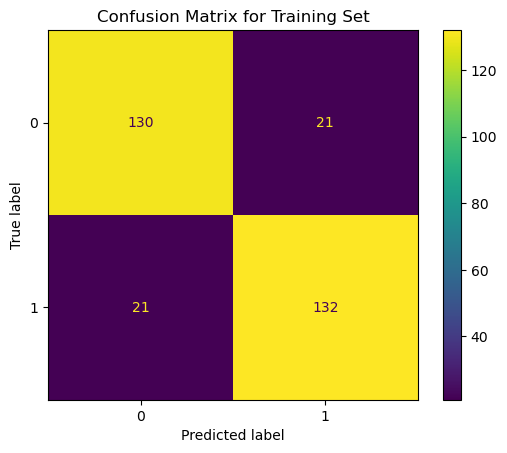

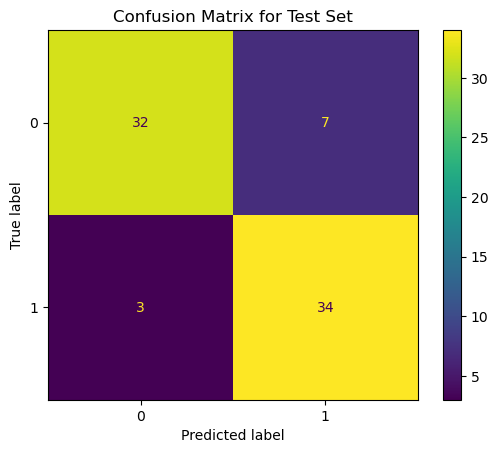

In [130]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

model = GaussianNB(var_smoothing=1e-09, 
                     priors=[0.3, 0.7])
model.fit(train_feature, train_label)

# Confusion matrix for the training set
predicted_train = model.predict(train_feature)
cm_train = metrics.confusion_matrix(train_label, predicted_train)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
cm_display_train.plot()
plt.title('Confusion Matrix for Training Set')
plt.show()

# Confusion matrix for the test set
predicted_test = model.predict(test_feature)
cm_test = metrics.confusion_matrix(test_label, predicted_test)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
cm_display_test.plot()
plt.title('Confusion Matrix for Test Set')
plt.show()

# best hyperparameters for whole data set

# run the upper part to take orginal X and y, then run below code 

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the Gaussian Naive Bayes model
nb = GaussianNB()

# Define the parameter grid to search over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7],
    'priors': [None, [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3]]
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = RandomizedSearchCV(estimator=nb, param_distributions=param_grid, n_iter=100, cv=5, 
                               scoring='accuracy', n_jobs=-1, random_state=42)
grid_search.fit(X,y)

# Print the best hyperparameters and corresponding cross-validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)



Best hyperparameters:  {'var_smoothing': 1e-07, 'priors': None}
Best cross-validation score:  0.8482001755926252


In [125]:
X.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.562500,76.711310,14.502976,2.529762,27.157738,1491.306548,0.730211,1.193595
std,0.496818,7.614793,2.900333,1.113958,3.838003,179.940267,0.037313,0.140914
min,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,0.000000,71.000000,12.000000,2.000000,26.000000,1357.000000,0.700750,1.097500
50%,1.000000,76.000000,14.000000,2.000000,29.000000,1475.000000,0.731000,1.190000
75%,1.000000,82.000000,16.000000,3.000000,30.000000,1599.750000,0.756000,1.293000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


In [9]:

from sklearn.metrics import confusion_matrix
nb_best = GaussianNB(var_smoothing= 1e-07, priors= None)
nb_best.fit(train_feature, train_label)

nb_best_predict = nb_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, nb_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, nb_best_predict))

=== Confusion Matrix ===
[[36  2]
 [ 4 26]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        38
           1       0.93      0.87      0.90        30

    accuracy                           0.91        68
   macro avg       0.91      0.91      0.91        68
weighted avg       0.91      0.91      0.91        68



In [27]:

from sklearn.metrics import confusion_matrix

xgb_best_predict = xgb_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, xgb_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, xgb_best_predict))

=== Confusion Matrix ===
[[35  4]
 [ 5 32]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.89      0.86      0.88        37

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [28]:

from sklearn.metrics import confusion_matrix

lda_best_predict = lda_best.predict(test_feature)

print("=== Confusion Matrix ===")
print(confusion_matrix(test_label, lda_best_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(test_label, lda_best_predict))

=== Confusion Matrix ===
[[37  2]
 [ 8 29]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        39
           1       0.94      0.78      0.85        37

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76

